In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [131]:
cars_data = pd.read_csv('cardataset.csv')

In [132]:
cars_data.shape

(398, 8)

In [133]:
cars_data.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [134]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [135]:
# by above 'hp' is an object but given that it is a continuous variable. this means it might contain
# non numeric data so lets check the unique values of hp.
cars_data['hp'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

it has non numeric data so we have to drop those rows

In [136]:
cars_data = cars_data.replace({'?': np.nan})

In [137]:
cars_data['hp'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', nan, '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [138]:
cars_data = cars_data.dropna()

In [139]:
cars_data.shape

(392, 8)

6 rows were dropped.

In [140]:
# 'hp' datatype is object but it is continuous so we have to convert its data type.
cars_data['hp'] = cars_data['hp'].astype('float64')

In [141]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
car name    392 non-null object
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null float64
wt          392 non-null int64
acc         392 non-null float64
yr          392 non-null int64
mpg         392 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


In [142]:
cars_data.isna().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

There are no missing values

In [143]:
cars_data.nunique()

car name    301
cyl           5
disp         81
hp           93
wt          346
acc          95
yr           13
mpg         127
dtype: int64

In [144]:
cars_data.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


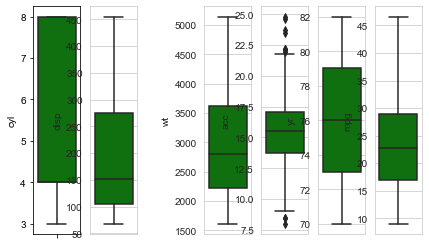

In [15]:
l = cars_data.columns.values
number_of_columns=len(l)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    if cars_data[l[i]].dtypes != object:
        plt.subplot(number_of_rows + 1,number_of_columns,i+1)
        sns.set_style('whitegrid')
        sns.boxplot(cars_data[l[i]],color='green',orient='v')

only 'acc' has outliers

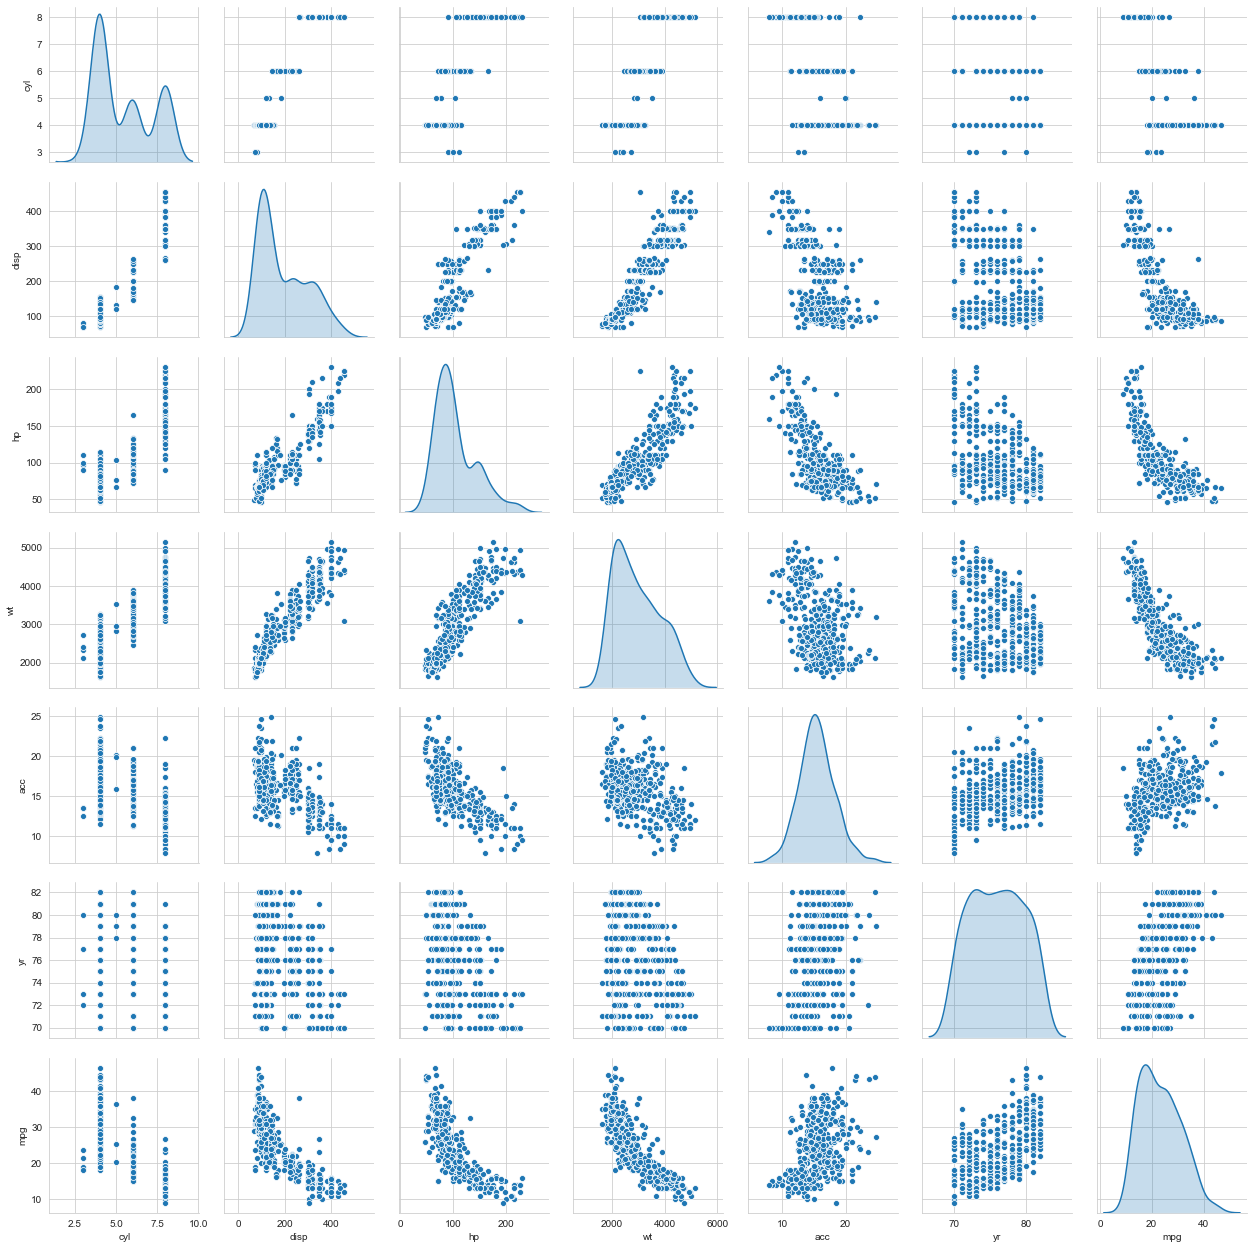

In [73]:
sns.pairplot(cars_data, diag_kind = 'kde')

'cyl', 'disp' and 'wt' are strongly positively correlated withn eachother and are strongly negatively correlated withn 'mpg'. 
The distribution curves on the diagnol shows a maximum of 3 clusters.

In [145]:
# let's standardize the data
from scipy.stats import zscore

In [146]:
numeric_cols = cars_data.drop('car name', axis=1)
car_names = cars_data.pop('car name')

In [147]:
numeric_cols = numeric_cols.apply(zscore)

In [148]:
cars_data = numeric_cols.join(car_names)
cars_data.head()

,cyl,disp,hp,wt,acc,yr,mpg,car name
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.698638,chevrolet chevelle malibu
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-1.083498,buick skylark 320
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.698638,plymouth satellite
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.955212,amc rebel sst
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.826925,ford torino


In [171]:
# Now, we will use K-Means clustering to group data. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

In [172]:
#Sample calculation for two clusters
k = 3
model = KMeans(n_clusters=k)

In [173]:
model.fit(numeric_cols)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [174]:
clusters = model.predict(numeric_cols)

In [175]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0,
       0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,

In [176]:
model.cluster_centers_

array([[-0.86110766, -0.81098162, -0.6843036 , -0.79514908,  0.36356374,
         0.30830628,  0.76382895],
       [ 1.48394702,  1.48591152,  1.49929313,  1.38738246, -1.06597113,
        -0.66682598, -1.15155766],
       [ 0.3470398 ,  0.2384915 , -0.04424757,  0.30335558,  0.29291981,
         0.01126948, -0.4725839 ]])

In [177]:
distortions = sum(np.min(cdist(numeric_cols, model.cluster_centers_, 'euclidean'), axis=1))

In [178]:
distortions

560.7970651807949

In [179]:
distortions / numeric_cols.shape[0]

1.4306047581142727

In [191]:
# Now calculate distortions for 1 to 10 clusters
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(numeric_cols)
    prediction=model.predict(numeric_cols)
    distortions = sum(np.min(cdist(numeric_cols, model.cluster_centers_, 'euclidean'), axis=1))
    meanDistortions.append( distortions / numeric_cols.shape[0])

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

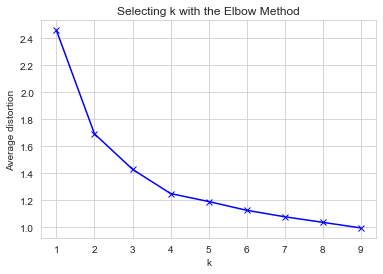

In [55]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

based on the elbow method, there is a bend at k = 3, so we will build 3 clusters.

In [98]:
numeric_cols['clusters'] = clusters

In [101]:
numeric_cols.head()

,cyl,disp,hp,wt,acc,yr,mpg,clusters
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.698638,1
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-1.083498,1
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.698638,1
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.955212,1
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.826925,1


In [106]:
# seperating the clusters
numeric_cols_c1 = numeric_cols[numeric_cols['clusters']==0].drop('clusters', axis = 1)
numeric_cols_c2 = numeric_cols[numeric_cols['clusters']==1].drop('clusters', axis = 1)
numeric_cols_c3 = numeric_cols[numeric_cols['clusters']==2].drop('clusters', axis = 1)

# cluster-1 linear regression model

In [119]:
#Copy all the predictor variables into x1 dataframe. Since 'mpg' is dependent variable drop it
x1 = numeric_cols_c1.drop('mpg', axis = 1)
# Copy the 'mpg' column alone into the y1 dataframe. This is the dependent variable
y1 = numeric_cols_c1['mpg']

In [111]:
print(x1.shape)
print(y1.shape)

(202, 6)
(202,)


In [112]:
#Let us break the X and y dataframes into training set and test set.
from sklearn.model_selection import train_test_split

In [113]:
# Split X and y into training and test set in 75:25 ratio
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=1)

In [115]:
x1_train.head(2)

,cyl,disp,hp,wt,acc,yr
356,-0.864014,-0.826826,-0.766593,-0.739798,0.456812,1.364599
335,-0.864014,-0.692868,-0.428421,-0.562977,-0.160171,1.092789


In [117]:
# lets call the LinearRegression model
regression_model = LinearRegression()
regression_model.fit(x1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
regression_model.coef_

array([ 1.96156397, -0.94539602, -0.21799819, -0.50546955,  0.02121653,
        0.42918643])

# cluster-2 linear regression model

In [120]:
x2 = numeric_cols_c2.drop('mpg', axis = 1)
y2 = numeric_cols_c2['mpg']

In [122]:
# Split x2 and y2 into training and test set in 75:25 ratio
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.25, random_state=1)

In [123]:
regression_model.fit(x2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
regression_model.coef_

array([ 0.        ,  0.03165121, -0.14683601, -0.17383543, -0.15366172,
        0.17649217])

# cluster-3 linear regression model

In [126]:
x3 = numeric_cols_c3.drop('mpg', axis = 1)
y3 = numeric_cols_c3['mpg']

In [127]:
# Split x3 and y3 into training and test set in 75:25 ratio
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.25, random_state=1)

In [128]:
regression_model.fit(x3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
regression_model.coef_

array([ 0.22089263, -0.18909954, -0.18072416, -0.34171499, -0.11028303,
        0.23351762])